# Matthew Przybyla

# SMU Machine Learning Final

# TensorFlow and Regression

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Reference: This model is from an already established dataset and project, tuned, and changed
based on personal preference and experience learned from the MSDS - ML class with additional analysis

Reference Notebook: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

File descriptions
train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

# Project Beginnings

Dataset:
Do you have the data set already?
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
Yes, this data is public and for the most part, ready for modeling. I have already practiced data cleaning so I want my focus to be more on the model, accuracy, and real-world problems.
If not, when will you have the data set? Current dataset is small, I’d like to include more records if I catch some free time.
How many rows of data will your data set have? 2,920
How many columns of data will your data set have? 80
Will your problem the classification or regression? Regression
If it is classification how many labels will you have? N/A
By what date will you have all of your data in raw form? Focusing on the current dataset I already have, but would like to make it larger if possible.
By what date we have all of your data in matrix form? Current.
Analysis:
What  machine learning algorithms will you utilize? Random Forest, Linear Regression, and Gradient Boosting Regression .
Why do you think this is an appropriate choice? Because I have not performed Linear Regression in a while, and have seen it on many interview questions and work problems
How will you evaluate how will you evaluate the model accuracy? Mean Absolute Error, Mean Squared Error, R^2, and 10 - fold cross validation. 
What metrics will be the most important for your topic (overall accuracy, precision, recall, etc)? Overall accuracy
By what date will you have run a first pass machine learning algorithm? 10/26
By what date will you have finished your analysis? 11/12


In [142]:
# use this to make the annoying warnings go away
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Import the libraries

In [143]:
import numpy as np  
import pandas as pd  
import scipy.stats   
import scipy.special  
import subprocess
import sklearn.linear_model
import sklearn.model_selection
import sklearn.pipeline  
import sklearn.preprocessing  
import sklearn.ensemble  
import sklearn.kernel_ridge 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# Shape and description (columns) of the data

In [144]:
## import train and test data from the kaggle website link above

train_df = pd.read_csv('/Users/MatthewPrzybyla/Downloads/all/train.csv')
test_df = pd.read_csv('/Users/MatthewPrzybyla/Downloads/all/test.csv')

print('train_df.shape = ', train_df.shape)
print('test_df.shape = ', test_df.shape)

train_df.shape =  (1460, 81)
test_df.shape =  (1459, 80)


In [145]:
num_of_numerical_cols = train_df._get_numeric_data().columns.shape[0]
print(num_of_numerical_cols, 'numerical columns')
print(train_df.shape[1]-num_of_numerical_cols, 'categorial columns')
train_df.columns.values

38 numerical columns
43 categorial columns


array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [146]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [147]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Before Normalization of the response variable

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
mu = 180921.20 and sigma = 79415.29
Skewness: 1.882876
Kurtosis: 6.536282


/Users/MatthewPrzybyla/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


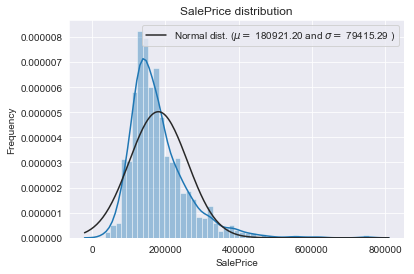

In [148]:
## Analyze SalePrice

print(train_df['SalePrice'].describe())

sns.distplot(train_df['SalePrice'], fit=scipy.stats.norm);

# fit a gaussian function to SalePrice
(mu, sigma) = scipy.stats.norm.fit(train_df['SalePrice'])

# mean, std, skewness and kurtosis
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

# After Normalization of the response variable

mu = 180921.20 and sigma = 79415.29
Skewness: 0.121347
Kurtosis: 0.809519


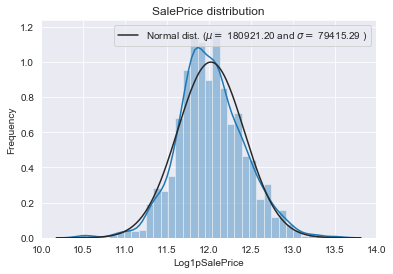

In [149]:
# create feature Log1pSalePrice = log(1+SalePrice)

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df["Log1pSalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution 
sns.distplot(train_df['Log1pSalePrice'] , fit=scipy.stats.norm);
(mu, sigma) = scipy.stats.norm.fit(train_df['SalePrice'])

# mean, std, skewness and kurtosis
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print("Skewness: %f" % train_df['Log1pSalePrice'].skew())
print("Kurtosis: %f" % train_df['Log1pSalePrice'].kurt())

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

In [150]:
## concatenate train and test data

data_df = pd.concat((train_df, test_df)).reset_index(drop=True)
data_df.drop(['SalePrice','Log1pSalePrice'], axis=1, inplace=True)
print("data_df.shape = ",data_df.shape)

data_df.shape =  (2919, 80)


# Missing data analysis

In [151]:
## check missing data

data_df_na = data_df.isnull().mean(axis=0)
data_df_na = data_df_na.drop(data_df_na[data_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Data Ratio': data_df_na})
print('data_df_na.shape = ', data_df_na.shape)
missing_data.head(5)

data_df_na.shape =  (34,)


,Missing Data Ratio
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468


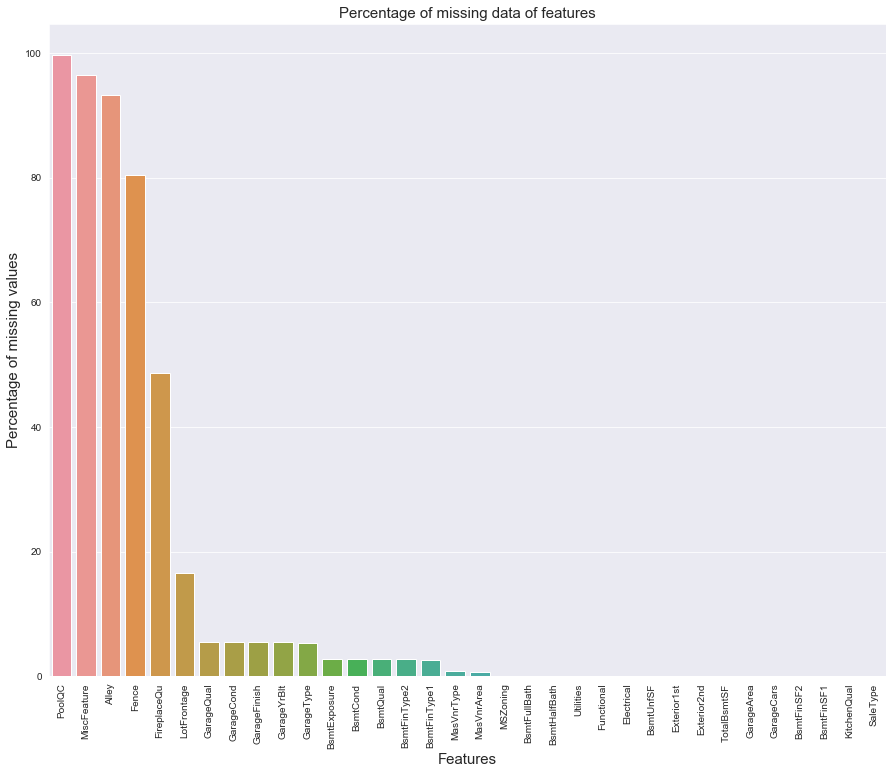

In [152]:
## visualize missing data

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x = data_df_na.index, y = 100*data_df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage of missing data of features', fontsize=15)

In [153]:
# treat missing values

# set missing values to None (which means that the house does not have those features)
data_df["PoolQC"] = data_df["PoolQC"].fillna("None") # has no pool
data_df["MiscFeature"] = data_df["MiscFeature"].fillna("None") # has no special feature 
data_df["Alley"] = data_df["Alley"].fillna("None") # has no alley access
data_df["Fence"] = data_df["Fence"].fillna("None") # has no fence 
data_df["FireplaceQu"] = data_df["FireplaceQu"].fillna("None") # has no fireplace

# group by neighborhoods and set missing values to 
# the median of LotFrontage of the corresponding neighborhoods
data_df["LotFrontage"] = data_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# no garage => set missing entries to None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data_df[col] = data_df[col].fillna('None')

# no garage => set missing entries to 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data_df[col] = data_df[col].fillna(0)

# having no basement => set missing entries to 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
            'BsmtHalfBath'):
    data_df[col] = data_df[col].fillna(0)
    
# having no basement => set missing entries to None
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data_df[col] = data_df[col].fillna('None')
    
# no masonry veneer => set Area = 0 and Type = None
data_df["MasVnrType"] = data_df["MasVnrType"].fillna("None")
data_df["MasVnrArea"] = data_df["MasVnrArea"].fillna(0)

# general zoning classification: set missing entry to most common value
data_df['MSZoning'] = data_df['MSZoning'].fillna(data_df['MSZoning'].mode()[0])

# for this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA
# => we can remove it
data_df = data_df.drop(['Utilities'], axis=1)

# set missing value to typical
data_df["Functional"] = data_df["Functional"].fillna("Typ")

# set missing entries to most common values
data_df['Electrical'] = data_df['Electrical'].fillna(data_df['Electrical'].mode()[0])
data_df['KitchenQual'] = data_df['KitchenQual'].fillna(data_df['KitchenQual'].mode()[0])
data_df['Exterior1st'] = data_df['Exterior1st'].fillna(data_df['Exterior1st'].mode()[0])
data_df['Exterior2nd'] = data_df['Exterior2nd'].fillna(data_df['Exterior2nd'].mode()[0])
data_df['SaleType'] = data_df['SaleType'].fillna(data_df['SaleType'].mode()[0])

# set missing value to None 
data_df['MSSubClass'] = data_df['MSSubClass'].fillna("None")

In [154]:
## check if missing values remain

data_df_na = data_df.isnull().median(axis = 0)
data_df_na = data_df_na.drop(data_df_na[data_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Data Ratio': data_df_na})
print('data_df_na.shape = ', data_df_na.shape)
missing_data.head()

data_df_na.shape =  (0,)


,Missing Data Ratio


# Feature analysis and tuning

In [155]:
## Convert numerical type into string type for categorial features 

# MSSubClass = The building class
data_df['MSSubClass'] = data_df['MSSubClass'].apply(str)

# changing OverallCond into a categorical variable
data_df['OverallCond'] = data_df['OverallCond'].astype(str)

# year and month sold are transformed into categorical features
data_df['YrSold'] = data_df['YrSold'].astype(str)
data_df['MoSold'] = data_df['MoSold'].astype(str)

In [156]:
## Encode some features with values between 0 and n_classes-1

# categorial features
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# apply sklearn.preprocessing.LabelEncoder to each categorical feature
for c in cols:
    lbl = sklearn.preprocessing.LabelEncoder() 
    lbl.fit(list(data_df[c].values)) 
    data_df[c] = lbl.transform(list(data_df[c].values))

# shape        
print('data_df.shape = ', data_df.shape)

data_df.shape =  (2919, 79)


In [157]:
## Create new feature: total sqfootage 

data_df['TotalSF'] = data_df['TotalBsmtSF'] + data_df['1stFlrSF'] + data_df['2ndFlrSF']

In [158]:
## Check the skewness of all numerical features

numerical_features = data_df.dtypes[data_df.dtypes != "object"].index
skewness_of_features = data_df[numerical_features].apply(lambda x: scipy.stats.skew(x.dropna())).sort_values(
    ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness_of_features})
skewness_df.head(10)

,Skewness
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [159]:
## Compute the Box-Cox transformation of 1 + x for skewed features

skewness_df = skewness_df[abs(skewness_df) > 0.75]
print("skewness_df.shape = ", skewness_df.shape)
skewed_features = skewness_df.index
lamb = 0.15
for feature in skewed_features:
    data_df[feature] = scipy.special.boxcox1p(data_df[feature], lamb)

skewness_df.shape =  (60, 1)


In [160]:
## Check skewness again

numerical_features = data_df.dtypes[data_df.dtypes != "object"].index
skewness_of_features = data_df[numerical_features].apply(lambda x: 
                            scipy.stats.skew(x.dropna())).sort_values(ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness_of_features})
skewness_df.head(10)

,Skewness
PoolArea,15.119426
3SsnPorch,8.924822
LowQualFinSF,8.744143
MiscVal,5.597060
LandSlope,4.532036
BsmtHalfBath,3.788243
KitchenAbvGr,3.698825
ScreenPorch,2.978396
BsmtFinSF2,2.564481
EnclosedPorch,2.025461


In [161]:
## use LabelEncoding or dummy variables on all categorial features

cols = data_df.select_dtypes(exclude = [np.number]).columns.values
print('numerical columns:', data_df.select_dtypes(include = [np.number]).columns.values.shape[0])
print('categorial columns:', cols.shape[0])

if True:
    # create dummy variables
    data_df = pd.get_dummies(data_df).copy()
else:
    # apply sklearn.preprocessing.LabelEncoder
    for c in cols:
        lbl = sklearn.preprocessing.LabelEncoder() 
        lbl.fit(list(data_df[c].values)) 
        data_df[c] = lbl.transform(list(data_df[c].values))

# shape        
print('data_df.shape = ', data_df.shape)

numerical columns: 60
categorial columns: 20
data_df.shape =  (2919, 222)


In [162]:
#correlations
df = data_df[:train_df.shape[0]]
df['SalePrice'] = train_df['SalePrice'].values
corrmat = df.corr()
#plt.subplots(figsize=(30,9))
#sns.heatmap(corrmat, vmax=0.9, square=True)
corr_values_df = pd.DataFrame(df.corr()['SalePrice'].abs().sort_values(ascending=True))

# show features that have the smallest correlation with SalePrice
print(corr_values_df[0:10])

/Users/MatthewPrzybyla/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                   SalePrice
RoofMatl_Metal      0.000304
RoofStyle_Mansard   0.000308
Foundation_Wood     0.002711
Condition2_RRAe     0.002993
MoSold              0.003564
BldgType_TwnhsE     0.003804
LotConfig_Corner    0.004145
Condition1_RRNe     0.004584
MiscFeature_Gar2    0.004744
RoofMatl_Tar&Grv    0.004921


In [163]:
## drop features

if False:
    drop_features = corr_values_df.index.values[0:100]
    data_df = data_df.drop(drop_features, axis = 1)

if False:
    drop_features = ['Id','MoSold','Condition2','LandContour']
    data_df = data_df.drop(drop_features, axis = 1)

if False:
    drop_features = ['Id','MoSold','Condition2','LandContour']
    data_df = data_df.drop(drop_features, axis = 1)
    
print('data_df.shape = ',data_df.shape)

data_df.shape =  (2919, 222)


# Split data into training/validation/test sets

In [164]:
# function to compute the root mean squared error
def get_rmse(y_pred, y_target):
    return np.sqrt(np.mean(np.square(y_pred.reshape(-1,) - y_target.reshape(-1,))))

# function to normalize data
def normalize_data(data): 
    # scale features using statistics that are robust to outliers
    # turns out that sklearn works very well 
    rs = sklearn.preprocessing.RobustScaler()
    rs.fit(data)
    data = rs.transform(data)
    #div = np.percentile(data,0.75,axis=0) - np.percentile(data,0.25,axis=0)
    #np.place(div, div < 1., 1.)
    #print(div)
    #data = (data-np.median(data,axis=0))/div
    return data

# normalize data to make it robust against outliers
data_df_norm = normalize_data(data_df.values)

# store train+validation data
x_train_valid = data_df_norm[:train_df.shape[0]]
y_train_valid = train_df.Log1pSalePrice.values
x_test = data_df_norm[train_df.shape[0]:]

# dictionaries for storing results
y_test_pred  = {}
rmse_train = {}
rmse_valid = {}

print('x_train_valid.shape = ', x_train_valid.shape)
print('y_train_valid.shape = ', y_train_valid.shape)
print('x_test.shape = ', x_test.shape)

x_train_valid.shape =  (1460, 222)
y_train_valid.shape =  (1460,)
x_test.shape =  (1459, 222)


# Neural Network Time

In [165]:
## implementation of a neural network

# global parameters needed for next_batch function
perm_array_train = np.array([])
index_in_epoch = 0 

# function to get the next mini batch
def next_batch(batch_size, x_train, y_train):
    global index_in_epoch, perm_array_train
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if not len(perm_array_train) ==  len(x_train):
        perm_array_train = np.arange(len(x_train))
    
    if index_in_epoch > len(x_train):
        np.random.shuffle(perm_array_train) # shuffle data
        start = 0 # start next epoch
        index_in_epoch = batch_size # set index to batch size
                
    end = index_in_epoch
    
    x_tr  = x_train[perm_array_train[start:end]]
    y_tr  = y_train[perm_array_train[start:end]].reshape(-1,1)
     
    return x_tr, y_tr

# function to create the graph
def create_nn_graph(num_input_features = 10, num_output_features = 1):

    # reset default graph
    tf.reset_default_graph()

    # parameters of nn architecture
    x_size = num_input_features # number of features
    y_size = num_output_features # output size
    n_n_fc1 = 256; # number of neurons of first layer
    n_n_fc2 = 32; # number of neurons of second layer

    # variables for input and output 
    x_data = tf.placeholder('float', shape=[None, x_size])
    y_data = tf.placeholder('float', shape=[None, y_size])

    # 1.layer: fully connected
    W_fc1 = tf.Variable(tf.truncated_normal(shape = [x_size, n_n_fc1], stddev = 0.1))
    b_fc1 = tf.Variable(tf.constant(0.1, shape = [n_n_fc1]))  
    h_fc1 = tf.nn.relu(tf.matmul(x_data, W_fc1) + b_fc1)

    # dropout
    tf_keep_prob = tf.placeholder('float')
    h_fc1_drop = tf.nn.dropout(h_fc1, tf_keep_prob)

    # 2.layer: fully connected
    W_fc2 = tf.Variable(tf.truncated_normal(shape = [n_n_fc1, n_n_fc2], stddev = 0.1)) 
    b_fc2 = tf.Variable(tf.constant(0.1, shape = [n_n_fc2]))  
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2) 

    # dropout
    h_fc2_drop = tf.nn.dropout(h_fc2, tf_keep_prob)

    # 3.layer: fully connected
    W_fc3 = tf.Variable(tf.truncated_normal(shape = [n_n_fc2, y_size], stddev = 0.1)) 
    b_fc3 = tf.Variable(tf.constant(0.1, shape = [y_size]))  
    y_pred = tf.cast(tf.matmul(h_fc2_drop, W_fc3) + b_fc3, dtype = tf.float32)

    # cost function huber_loss 
    #loss = tf.sqrt(tf.losses.mean_squared_error(labels=y_data, predictions=y_pred))
    loss = tf.sqrt(tf.reduce_mean(tf.square(y_data - y_pred)))

    # optimisation function
    tf_learn_rate = tf.placeholder(dtype='float', name="tf_learn_rate")
    train_step = tf.train.AdamOptimizer(tf_learn_rate).minimize(loss)
    
    # tf tensors
    tf_tensors = {'train_step': train_step, 'loss': loss, 'y_pred': y_pred,
                  'tf_keep_prob': tf_keep_prob, 'tf_learn_rate': tf_learn_rate,
                  'x_data': x_data, 'y_data': y_data}
    
    return tf_tensors

# function to train the graph
def train_nn_graph(tf_tensors, x_train, y_train, x_valid, y_valid, verbose = False):
    
    # tf tensors
    train_step = tf_tensors['train_step']
    loss = tf_tensors['loss']
    y_pred = tf_tensors['y_pred']
    tf_keep_prob = tf_tensors['tf_keep_prob']
    tf_learn_rate = tf_tensors['tf_learn_rate']
    x_data = tf_tensors['x_data']
    y_data = tf_tensors['y_data']
    
    # parameters
    train_set_size = x_train.shape[0]
    keep_prob = 0.5; # dropout regularization with keeping probability
    learn_rate_range = [0.01, 0.0075, 0.005, 0.0025, 0.001, 0.00075, 0.00050, 0.00025,
                        0.0001];
    learn_rate_step = 10 # in terms of epochs 
    batch_size = 10
    n_epoch = 100 # number of epochs

    # start TensorFlow session and initialize global variables
    sess = tf.InteractiveSession() 
    sess.run(tf.global_variables_initializer())  
    n_learnrate_step = 0;

    # iterate
    for i in range(int(n_epoch*train_set_size/batch_size)):

        # adapt learning rate
        if (i%int(learn_rate_step*train_set_size/batch_size) == 0 and 
            n_learnrate_step < len(learn_rate_range)):

            learn_rate = learn_rate_range[n_learnrate_step];
            if verbose: 
                print('nn: set learnrate = ', learn_rate)
            n_learnrate_step += 1;

        # get next batch
        x_batch, y_batch = next_batch(batch_size, x_train, y_train)

        sess.run(train_step, feed_dict={x_data: x_batch, y_data: y_batch, 
                                        tf_keep_prob: keep_prob, tf_learn_rate: learn_rate})

        # log the status
        if (verbose and i%int(2.*train_set_size/batch_size) == 0):
            train_loss = sess.run(loss,feed_dict={x_data: x_train, 
                                                  y_data: y_train, 
                                                  tf_keep_prob: 1.0})

            valid_loss = sess.run(loss,feed_dict={x_data: x_valid, 
                                                  y_data: y_valid, 
                                                  tf_keep_prob: 1.0})

            print('nn: %.2f epoch: train/val loss = %.4f/%.4f'%(
                (i+1)*batch_size/train_set_size, train_loss, valid_loss))

    # store rmse 
    y_train_pred = y_pred.eval(feed_dict={x_data: x_train, tf_keep_prob: 1.0}).flatten()
    y_valid_pred = y_pred.eval(feed_dict={x_data: x_valid, tf_keep_prob: 1.0}).flatten()
    y_test_pred = y_pred.eval(feed_dict={x_data: x_test, tf_keep_prob: 1.0}).flatten()

    sess.close();
    
    return (y_train_pred, y_valid_pred, y_test_pred)

In [166]:
## check training of neural network

if False:
    # create graph and receive tf tensors
    tf_tensors = create_nn_graph(x_train_valid.shape[1], 1)

    # cross validations
    cv_num = 10
    kfold = sklearn.model_selection.KFold(cv_num, shuffle=True)

    for train_index, valid_index in kfold.split(x_train_valid):

        x_train = x_train_valid[train_index]
        y_train = y_train_valid[train_index].reshape(-1,1)
        x_valid = x_train_valid[valid_index]
        y_valid = y_train_valid[valid_index].reshape(-1,1)

        # train nn
        (y_train_pred['nn'], 
         y_valid_pred['nn'],
         y_test_pred['nn']) = train_nn_graph(tf_tensors, x_train,  
                                             y_train, x_valid,  y_valid, True)
        
        # loss
        print('nn: train/val loss = %.4f/%.4f'%(get_rmse(y_train_pred['nn'],y_train),
                                                get_rmse(y_valid_pred['nn'], y_valid)))
        

# Gradient Boosting and Random Forest Regressors

In [167]:
## Training base models

gboost = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
rforest = sklearn.ensemble.RandomForestRegressor(n_estimators=3000,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state =5)


# store models in dictionary
model_init = {'gboost': gboost, 'rforest': rforest}

# choose the models to train on
take_base_models = ['gboost', 'rforest']

# dictionaries to store results
rmse_valid = {}
rmse_train = {}
y_train_pred = {}
y_valid_pred = {}
y_test_pred = {}

# initialize variables to zero
for mn in take_base_models:
    rmse_train[mn] = 0
    rmse_valid[mn] = 0
    y_test_pred[mn] = 0

# number of cross validations
cv_num = 10
kfold = sklearn.model_selection.KFold(cv_num, shuffle=True)

# cross-validation
for i, (train_index, valid_index) in enumerate(kfold.split(x_train_valid)):
    
    print(i+1,'. training of models in progress')
    x_train = x_train_valid[train_index]
    y_train = y_train_valid[train_index]
    x_valid = x_train_valid[valid_index]
    y_valid = y_train_valid[valid_index]
    
    for mn in take_base_models:
        
        if mn == 'nn':
            # create graph and receive tf tensors
            tf_tensors = create_nn_graph(x_train_valid.shape[1], 1)
    
            # train neural network
            params = train_nn_graph(tf_tensors, x_train, y_train.reshape(-1,1),
                                    x_valid, y_valid.reshape(-1,1), False) 
    
            rmse_train['nn'] += get_rmse(params[0],y_train)
            rmse_valid['nn'] += get_rmse(params[1],y_valid)
            y_test_pred['nn'] += params[2]

        else:
            # create cloned model from model_init
            model = sklearn.base.clone(model_init[mn])
            model.fit(x_train, y_train)
            y_test_pred[mn] += model.predict(x_test)
            rmse_train[mn] += get_rmse(model.predict(x_train), y_train)
            rmse_valid[mn] += get_rmse(model.predict(x_valid), y_valid)
          
print('')
# store and print results
for mn in take_base_models:
    
    rmse_train[mn] /= cv_num
    rmse_valid[mn] /= cv_num
    y_test_pred[mn] /= cv_num
        
    print(mn,'train/valid RMSE = %.3f/%.3f'%(rmse_train[mn], rmse_valid[mn]))

# average rmse over the following models
take_model_avg = ['gboost', 'rforest']

rmse_train['averaged'] = 0
rmse_valid['averaged'] = 0

for mn in take_model_avg:
    rmse_train['averaged'] += rmse_train[mn]**2
    rmse_valid['averaged'] += rmse_valid[mn]**2

# average rmse
rmse_train['averaged'] = np.sqrt(rmse_train['averaged']/len(take_model_avg)) 
rmse_valid['averaged'] = np.sqrt(rmse_valid['averaged']/len(take_model_avg)) 

print('')
print('Average the following models:', take_model_avg)
print('Averaged train/valid RMSE = %.3f/%.3f'%(rmse_train['averaged'],
                                               rmse_valid['averaged']))

1 . training of models in progress
2 . training of models in progress
3 . training of models in progress
4 . training of models in progress
5 . training of models in progress
6 . training of models in progress
7 . training of models in progress
8 . training of models in progress
9 . training of models in progress
10 . training of models in progress

gboost train/valid RMSE = 0.055/0.123
rforest train/valid RMSE = 0.181/0.189

Average the following models: ['gboost', 'rforest']
Averaged train/valid RMSE = 0.134/0.159


This gboost has a smaller RMSE than the rforest model, therefore it is better

# Let's see if we can get our RMSE lower

In [168]:
# choose models for out-of-folds predictions

take_base_models = ['gboost','rforest']

# choose meta model
take_meta_model = 'gboost'

# cross validations
kfold = sklearn.model_selection.KFold(len(take_base_models), shuffle=True)

# train data for meta model
x_train_meta = np.array([])
y_train_meta = np.array([])
x_test_meta = np.zeros(x_test.shape[0])

# make out-of-folds predictions from base models
for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):
    
    x_train = x_train_valid[train_index]
    y_train = y_train_valid[train_index]
    x_valid = x_train_valid[valid_index]
    y_valid = y_train_valid[valid_index]
    
    if take_base_models[i] == 'nn':
        # create graph and receive tf tensors
        tf_tensors = create_nn_graph(x_train_valid.shape[1], 1)

        # train neural network
        params = train_nn_graph(tf_tensors, x_train, y_train.reshape(-1,1),
                                x_valid, y_valid.reshape(-1,1), False) 

        y_train_pred['tmp'] = params[0]
        y_valid_pred['tmp'] = params[1]
        y_test_pred['tmp'] = params[2]

    else:
        # create cloned model from base models
        model = sklearn.base.clone(model_init[take_base_models[i]])
        model.fit(x_train, y_train)
        y_train_pred['tmp'] = model.predict(x_train)
        y_valid_pred['tmp'] = model.predict(x_valid)
        y_test_pred['tmp'] = model.predict(x_test)

    # collect train and test data for meta model 
    x_train_meta = np.concatenate([x_train_meta, y_valid_pred['tmp']])
    y_train_meta = np.concatenate([y_train_meta, y_valid]) 
    x_test_meta += y_test_pred['tmp']
    
    print(take_base_models[i],': train/valid rmse = %.3f/%.3f'%(
        get_rmse(y_train_pred['tmp'], y_train), get_rmse(y_valid_pred['tmp'], y_valid)))

x_train_meta = x_train_meta.reshape(-1,1)
x_test_meta = (x_test_meta/len(take_base_models)).reshape(-1,1)
y_test_pred['stacked'] = x_test_meta

print('')
print('Stacked base models: valid rmse = ', get_rmse(x_train_meta, y_train_meta))

# train meta model
model = sklearn.base.clone(model_init[take_meta_model]) 
model.fit(x_train_meta, y_train_meta)
y_train_pred['meta model'] = model.predict(x_train_meta)
y_test_pred['meta model'] = model.predict(x_test_meta)

print('Meta model: train rmse = ', get_rmse(x_train_meta, y_train_pred['meta model']))

gboost : train/valid rmse = 0.050/0.130
rforest : train/valid rmse = 0.184/0.189

Stacked base models: valid rmse =  0.16237653267407146
Meta model: train rmse =  0.08392376806380931


# Implement the model on the submission csv file downloaded from kaggle

In [169]:
## choose the test prediction

y_test_submit = y_test_pred['meta model']

sub_df = pd.DataFrame()
sub_df['Id'] = test_df['Id'].values
sub_df['SalePrice'] = np.expm1(y_test_submit)
sub_df.to_csv('submission.csv',index=False)
sub_df.head(10)

,Id,SalePrice
0,1461,124435.512871
1,1462,161420.123271
2,1463,178976.872946
3,1464,191898.344034
4,1465,184048.601754
5,1466,184048.601754
6,1467,168854.643523
7,1468,176722.782648
8,1469,164879.527137
9,1470,129700.909498


# Conclusion and Future Work

Conclusion:
The code provided helped to gain a better understanding of neural networks and the use of TensorFlow. The part where I learned the most was the implementation of the different regressors to see how their RMSE's were different.

The stacked modeling appraoch was slightly better from 0.160 to 0.157 for the RMSE as expected.

*after rerunning a few times, the stacked approach was actually worse from 0.159 to 0.162.

Future Work:
Utilize more models like Lasso to ensure that the RMSE can be improved upon (smaller).
A model like this could prove to be valuable in the housing and travel industry, such as where I currently work.